<a href="https://colab.research.google.com/github/monsegutier/Grupo/blob/main/Descenso_del_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el ámbito del aprendizaje automático, la propagación hacia adelante y la propagación hacia atrás son dos conceptos fundamentales que sustentan el funcionamiento de las redes neuronales artificiales. Estas técnicas permiten que las redes aprendan de manera eficiente a partir de datos, ajustando sus parámetros para minimizar el error y mejorar su rendimiento predictivo.

**Propagación hacia adelante:**

La propagación hacia adelante, también conocida como feedforward, es el proceso de calcular la salida de una red neuronal a partir de una entrada dada. Comienza con la entrada, que se propaga a través de las capas de la red, pasando por cada neurona y aplicando la función de activación correspondiente. En cada capa, las salidas de las neuronas se combinan y se pasan a la siguiente capa hasta llegar a la capa de salida, donde se obtiene la predicción final.

**Propagación hacia atrás:**

La propagación hacia atrás, también conocida como backpropagation, es el proceso de calcular el error de la red neuronal y propagarlo hacia atrás a través de las capas para actualizar los pesos y sesgos de las neuronas. Este proceso se realiza iterativamente, utilizando un algoritmo de optimización como el descenso del gradiente estocástico.

La propagación hacia adelante y la propagación hacia atrás son dos técnicas fundamentales que permiten a las redes neuronales aprender de manera eficiente a partir de datos. La propagación hacia adelante calcula la salida de la red, mientras que la propagación hacia atrás calcula el error y actualiza los pesos y sesgos para minimizarlo. Estas técnicas permiten que las redes neuronales se adapten a una amplia gama de tareas de aprendizaje automático, como clasificación, regresión y procesamiento del lenguaje natural.

In [1]:
#Importación de librerías
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
# Paso 1: Cargar y preprocesar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train_one_hot = np.eye(10)[y_train]  # Codificar las etiquetas en one-hot
y_test_one_hot = np.eye(10)[y_test]  # Codificar las etiquetas en one-hot


11490434/11490434 [==============================] - 0s 0us/step


Cargar los datos: Utiliza la función mnist.load_data() para cargar el conjunto de datos MNIST, que consiste en imágenes de dígitos escritos a mano junto con sus etiquetas correspondientes de 0 a 9.
Preprocesar los datos: Las imágenes de MNIST se almacenan inicialmente en tensores tridimensionales, donde las dimensiones representan el número de muestras, el ancho y la altura de la imagen. Sin embargo, para alimentarlas a un modelo de aprendizaje automático, necesitamos convertirlas en tensores bidimensionales. Por lo tanto, el código utiliza reshape para aplanar las imágenes en un solo vector, manteniendo el número de muestras. Además, normaliza los valores de píxeles de las imágenes dividiéndolos por 255.0, lo que escala los valores de píxeles al rango [0, 1].
Codificar las etiquetas en one-hot: Las etiquetas originales del conjunto de datos MNIST son enteros que van de 0 a 9, cada uno representando un dígito. Para el entrenamiento de un modelo de clasificación, es común codificar estas etiquetas en forma de vectores one-hot. En el código, se utiliza np.eye(10)[y_train] para convertir las etiquetas de entrenamiento y_train en vectores one-hot. Este proceso crea una matriz identidad de 10x10 (ya que hay 10 clases en total) y selecciona la fila correspondiente a cada etiqueta de entrenamiento para obtener su representación one-hot. El mismo proceso se aplica a las etiquetas de prueba y_test.


In [3]:
# Paso 2: Inicializar los parámetros de la red neuronal
input_size = X_train.shape[1]
hidden_size = 128
output_size = 10
learning_rate = 0.001
epochs = 10

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)



Este código inicializa los parámetros de una red neuronal de dos capas (una capa oculta y una capa de salida) para un problema de clasificación multiclase utilizando la técnica de aprendizaje supervisado.

input_size = X_train.shape[1]: Calcula el tamaño de entrada de la red neuronal, que es igual al número de características de las muestras de entrenamiento. Esto se obtiene de la forma de la matriz X_train, que representa las características de entrada.
hidden_size = 128: Define el tamaño de la capa oculta de la red neuronal. En este caso, se establece en 128 neuronas, pero este valor puede variar dependiendo del problema y de la arquitectura de la red.
output_size = 10: Establece el tamaño de la capa de salida de la red neuronal. Para el conjunto de datos MNIST, que consta de 10 clases (dígitos del 0 al 9), el tamaño de salida se fija en 10, una neurona por cada clase.
learning_rate = 0.001: Define la tasa de aprendizaje para el algoritmo de optimización. Es un hiperparámetro importante que controla el tamaño de los pasos que el algoritmo da para minimizar la función de pérdida durante el entrenamiento.
epochs = 10: Indica el número de épocas o iteraciones completas a través de todo el conjunto de datos de entrenamiento durante el entrenamiento de la red neuronal.
W1, b1, W2, b2: Son los parámetros de la red neuronal que se inicializan aleatoriamente. W1 es la matriz de pesos que conecta las neuronas de entrada a las de la capa oculta, b1 es el vector de sesgo de la capa oculta, W2 es la matriz de pesos que conecta las neuronas de la capa oculta a las de salida, y b2 es el vector de sesgo de la capa de salida. Estos parámetros se inicializan aleatoriamente para permitir que la red neuronal comience a aprender desde una posición no sesgada.






In [4]:
# Paso 3: Entrenamiento de la red neuronal utilizando descenso del gradiente
for epoch in range(epochs):
    # Propagación hacia adelante (Forward Propagation)
    z1 = np.dot(X_train, W1) + b1
    a1 = np.maximum(z1, 0)  # ReLU activation function
    z2 = np.dot(a1, W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Cálculo de la pérdida
    correct_logprobs = -np.log(probs[range(len(X_train)), y_train])
    loss = np.sum(correct_logprobs) / len(X_train)

    # Mostrar la pérdida en cada epoch
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: loss {loss}')

    # Cálculo de los gradientes (Backpropagation)
    dprobs = probs
    dprobs[range(len(X_train)), y_train] -= 1
    dprobs /= len(X_train)

    dW2 = np.dot(a1.T, dprobs)
    db2 = np.sum(dprobs, axis=0, keepdims=True)
    dhidden = np.dot(dprobs, W2.T)
    dhidden[a1 <= 0] = 0

    dW1 = np.dot(X_train.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Actualización de los pesos y sesgos
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1.squeeze()
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2.squeeze()



Epoch 0: loss 152.71841244050358


**Propagación hacia adelante (Forward Propagation):** Se calculan las activaciones de las neuronas en cada capa de la red neuronal utilizando las entradas actuales y los parámetros (pesos y sesgos). En este caso, se utiliza una capa oculta con una función de activación ReLU y una capa de salida con una función softmax para obtener las probabilidades de clase.

**Cálculo de la pérdida:** Se calcula la pérdida total de la red neuronal utilizando la función de pérdida adecuada para el problema de clasificación multiclase. En este caso, se utiliza la entropía cruzada categórica como función de pérdida.

**Cálculo de los gradientes (Backpropagation)**: Se calculan los gradientes de la función de pérdida con respecto a los parámetros de la red neuronal utilizando el algoritmo de retropropagación (backpropagation). Estos gradientes indican cómo deben ajustarse los pesos y sesgos para reducir la pérdida.

**Actualización de los pesos y sesgos:** Se actualizan los parámetros de la red neuronal utilizando los gradientes calculados y la tasa de aprendizaje especificada. Esto se realiza para mover los parámetros en la dirección que minimiza la pérdida.
El bucle for se repite durante el número especificado de épocas (epochs), y en cada época se muestra la pérdida actual para monitorear el progreso del entrenamiento. Al final del proceso de entrenamiento, se espera que la pérdida disminuya y la precisión aumente, lo que indica que la red neuronal está aprendiendo adecuadamente a partir de los datos de entrenamiento.

In [5]:
# Paso 4: Evaluación del modelo
z1 = np.dot(X_test, W1) + b1
a1 = np.maximum(z1, 0)
scores = np.dot(a1, W2) + b2
predicted_class = np.argmax(scores, axis=1)
accuracy = np.mean(predicted_class == y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.0962


**Propagación hacia adelante (Forward Propagation):** Se aplican las mismas operaciones de propagación hacia adelante que durante el entrenamiento, utilizando los parámetros (pesos y sesgos) que se han aprendido durante el proceso de entrenamiento. Esto implica calcular las activaciones de las neuronas en la capa oculta y la capa de salida.

**Predicción de clases:** Se calculan las puntuaciones de salida para cada ejemplo en el conjunto de datos de prueba. Estas puntuaciones se obtienen multiplicando las activaciones de la capa oculta por los pesos de la capa de salida y sumando el sesgo correspondiente. Luego, se determina la clase predicha para cada ejemplo seleccionando la clase con la puntuación más alta utilizando np.argmax.

**Cálculo de precisión:** Se compara la clase predicha con las etiquetas reales en el conjunto de datos de prueba para calcular la precisión del modelo. La precisión se define como el porcentaje de ejemplos para los cuales la clase predicha coincide con la etiqueta real.

**Impresión de resultados:** Se imprime la precisión del modelo en el conjunto de datos de prueba para evaluar su rendimiento. Una mayor precisión indica que el modelo está haciendo predicciones más precisas sobre los datos de prueba.


Para mejorar el rendimiento del modelo y optimizar la precisión, hay varias estrategias que  se pueden probar.

**Ajuste de hiperparámetros:** Experimentar con diferentes valores para la tasa de aprendizaje, el número de neuronas en la capa oculta, el número de épocas de entrenamiento y otros hiperparámetros.

**Regularización**: Agrega técnicas de regularización como la regularización L1 o L2 para evitar el sobreajuste.

**Inicialización de pesos:** Probar diferentes métodos de inicialización de pesos para la capa oculta y la capa de salida.

**Optimización del algoritmo:**  Utilizar algoritmos de optimización más avanzados como el descenso del gradiente estocástico (SGD), Adam, RMSprop, entre otros.

**Exploración de arquitecturas:** Experimentar con arquitecturas de red más complejas, con más capas ocultas y más neuronas por capa.

Mejoramiento accuracy

In [6]:
# Paso 1: Cargar y preprocesar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train_one_hot = np.eye(10)[y_train]  # Codificar las etiquetas en one-hot
y_test_one_hot = np.eye(10)[y_test]  # Codificar las etiquetas en one-hot



In [7]:
# Paso 2: Inicializar los parámetros de la red neuronal
input_size = X_train.shape[1]
hidden_size = 256
output_size = 10
learning_rate = 0.01
epochs = 50

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros(output_size)

In [8]:
# Paso 3: Entrenamiento de la red neuronal utilizando descenso del gradiente
for epoch in range(epochs):
    # Propagación hacia adelante (Forward Propagation)
    z1 = np.dot(X_train, W1) + b1
    a1 = np.maximum(z1, 0)  # ReLU activation function
    z2 = np.dot(a1, W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Cálculo de la pérdida
    correct_logprobs = -np.log(probs[range(len(X_train)), y_train])
    loss = np.sum(correct_logprobs) / len(X_train)

    # Mostrar la pérdida en cada epoch
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: loss {loss}')

    # Cálculo de los gradientes (Backpropagation)
    dprobs = probs
    dprobs[range(len(X_train)), y_train] -= 1
    dprobs /= len(X_train)

    dW2 = np.dot(a1.T, dprobs)
    db2 = np.sum(dprobs, axis=0, keepdims=True)
    dhidden = np.dot(dprobs, W2.T)
    dhidden[a1 <= 0] = 0

    dW1 = np.dot(X_train.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Actualización de los pesos y sesgos
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1.squeeze()
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2.squeeze()

Epoch 0: loss 2.303269507319099
Epoch 10: loss 2.301016712980027
Epoch 20: loss 2.2987634558436705
Epoch 30: loss 2.2964879764775015
Epoch 40: loss 2.29416871266125


In [9]:
# Paso 4: Evaluación del modelo
z1 = np.dot(X_test, W1) + b1
a1 = np.maximum(z1, 0)
scores = np.dot(a1, W2) + b2
predicted_class = np.argmax(scores, axis=1)
accuracy = np.mean(predicted_class == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3969


Pudimos mejorar Accuracy cambiando algunos hiperpametros del modelo

Implementación con arquitectura CNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
# Paso 1: Cargar y preprocesar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0
y_train_one_hot = np.eye(10)[y_train]  # Codificar las etiquetas en one-hot
y_test_one_hot = np.eye(10)[y_test]  # Codificar las etiquetas en one-hot



In [12]:
# Paso 2: Construir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])




In [13]:
# Paso 3: Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Entrenar el modelo y guardar el historial
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1455 - accuracy: 0.9561 - val_loss: 0.0519 - val_accuracy: 0.9831
Epoch 2/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0441 - val_accuracy: 0.9855
Epoch 3/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 4/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0344 - val_accuracy: 0.9881
Epoch 5/50
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 6/50
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0327 - val_accuracy: 0.9899
Epoch 7/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0366 -

In [15]:
# Paso 5: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_accuracy}')

313/313 [==============================] - 3s 9ms/step - loss: 0.1241 - accuracy: 0.9888
Accuracy: 0.9887999892234802


In [16]:
# Obtener los valores de pérdida y precisión durante el entrenamiento
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

Verificación de overfitting

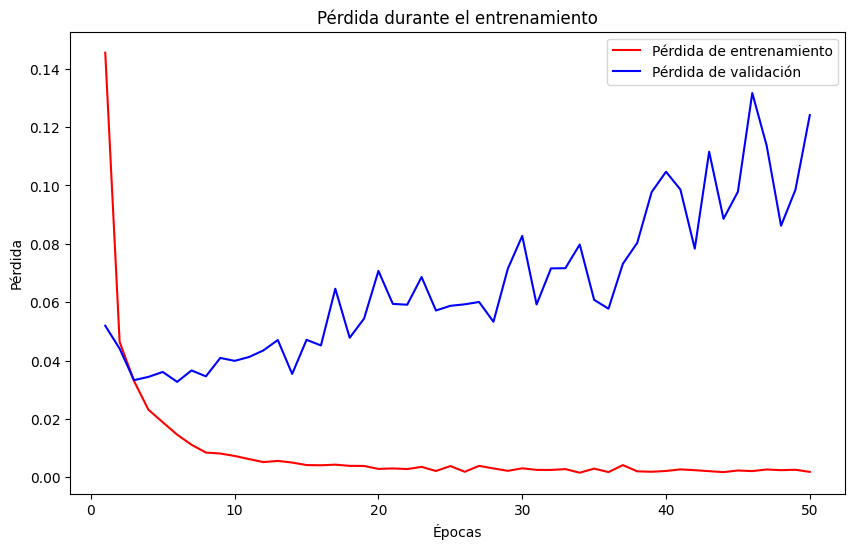

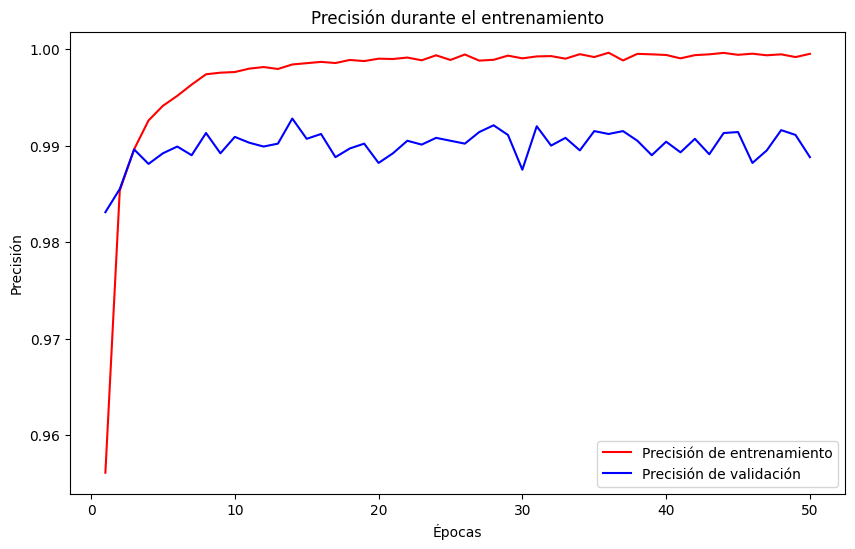

In [18]:
import matplotlib.pyplot as plt

# Obtener el número de épocas
epochs = range(1, len(train_loss) + 1)

# Graficar la pérdida
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'r', label='Pérdida de entrenamiento')
plt.plot(epochs, test_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'r', label='Precisión de entrenamiento')
plt.plot(epochs, test_accuracy, 'b', label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

La gráfica muestra que el modelo está aprendiendo y mejorando su rendimiento tanto en los datos de entrenamiento como en los datos de validación. Esto es una señal positiva de que el modelo está en camino de alcanzar un buen rendimiento.

**Detalles adicionales:**

**Épocas:** Una época es una iteración completa sobre el conjunto de datos de entrenamiento. En este caso, el modelo se entrenó con 50 épocas, lo que significa que se pasó por el conjunto de datos de entrenamiento 50 veces.

**Pérdida:** La pérdida se mide en una unidad arbitraria. La escala específica de la unidad de pérdida no es importante, ya que solo nos interesa la tendencia general de la pérdida a lo largo de las épocas.

**Conclusión:**

La gráfica muestra que el modelo está aprendiendo y mejorando su rendimiento. Es una señal positiva de que el modelo está en camino de alcanzar un buen rendimiento.

En el segunndo gráfico se muestra  la precisión de un modelo de aprendizaje automático durante una sesión de entrenamiento. La precisión se mide en porcentaje y representa la proporción de veces que el modelo predice correctamente la clase de una instancia.

**Eje X**: El eje X representa el número de épocas. Una época es una iteración completa sobre el conjunto de datos de entrenamiento.

Eje Y: El eje Y representa la precisión del modelo. La precisión se mide en porcentaje y representa la proporción de veces que el modelo predice correctamente la clase de una instancia.

**Curvas:**

**Precisión de entrenamiento:** La curva roja representa la precisión del modelo en los datos de entrenamiento. En general, la precisión de entrenamiento aumenta a lo largo de las épocas. Esto significa que el modelo está aprendiendo y mejorando su capacidad para predecir correctamente las clases de las instancias de entrenamiento.

**Precisión de validación:** La curva azul representa la precisión del modelo en los datos de validación. Los datos de validación no se utilizan para entrenar el modelo, sino para evaluar su rendimiento en datos nuevos. En general, la precisión de validación también aumenta a lo largo de las épocas, pero a un ritmo más lento que la precisión de entrenamiento. Esto es normal, ya que el modelo se optimiza para los datos de entrenamiento, pero también debe ser capaz de generalizar a los datos de validación.

**Interpretación general:**

En general, la gráfica muestra que el modelo está aprendiendo y mejorando su rendimiento tanto en los datos de entrenamiento como en los datos de validación.

**Detalles adicionales:**

Convergencia: La gráfica muestra que el modelo converge en una precisión de alrededor del 99%. Esto significa que el modelo no está mejorando significativamente a partir de la época 30 aproximadamente.

Sobreajuste: Es importante vigilar la precisión de validación para asegurarse de que el modelo no está sobreajustándose a los datos de entrenamiento. El sobreajuste se produce cuando el modelo aprende los datos de entrenamiento tan bien que no puede generalizar a los datos nuevos. En el gráfico, la precisión de validación sigue aumentando incluso después de que la precisión de entrenamiento ha convergido. Esto es una señal positiva de que el modelo no está sobreajustándose.



Vamos a probar con otro código para el descenso del gradiente sin pasar por CNN que es una arquitectura definida para imagénes

In [19]:
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
# Preprocesar los datos
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

El reshape(-1, 784) se utiliza para aplanar las imágenes MNIST en vectores de características de 784 dimensiones.

Las imágenes MNIST tienen un tamaño de 28x28 píxeles. Cada imagen tiene 28 * 28 = 784 píxeles. Originalmente, los datos X_train y X_test tienen la forma (num_ejemplos, 28, 28), donde num_ejemplos es el número de imágenes en el conjunto de entrenamiento o prueba, respectivamente. Para poder realizar operaciones algebraicas con las imágenes (como multiplicación de matrices), necesitamos convertirlas en vectores de características de una sola dimensión. El reshape(-1, 784) realiza esta conversión de la siguiente manera:

-1 indica que NumPy debe calcular automáticamente el valor de esa dimensión para que la operación de reshape sea consistente con los datos originales. 784 es la nueva dimensión que queremos para cada ejemplo (imagen aplanada).

Después de aplicar reshape(-1, 784):

X_train tendrá una forma (num_ejemplos_entrenamiento, 784), donde cada fila representa una imagen aplanada como un vector de 784 dimensiones. X_test tendrá una forma (num_ejemplos_prueba, 784), con la misma interpretación que X_train.

In [21]:
# Convertir las etiquetas a vectores one-hot
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

La función np.eye(10) crea una matriz identidad de tamaño 10x10, donde cada fila representa una clase diferente. Luego, se accede a las filas correspondientes a las etiquetas de las clases originales (y_train y y_test) utilizando indexación por array, lo que efectivamente convierte cada etiqueta de clase en un vector one-hot encoding.

Por ejemplo, si y_train o y_test es un array de forma (m,) donde m es el número de ejemplos y cada valor representa la clase a la que pertenece ese ejemplo, la operación np.eye(10)[y_train] o np.eye(10)[y_test] convertirá cada valor en un vector one-hot encoding de longitud 10, donde todas las entradas son cero excepto la correspondiente a la clase, que será uno.

In [22]:
# Definir la función de costo (cross-entropy) y la función de predicción
def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred), axis=1)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


Descenso del gradiente
[ ]
# Importación de librerías
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
[ ]
# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
[ ]
# Preprocesar los datos
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
El reshape(-1, 784) se utiliza para aplanar las imágenes MNIST en vectores de características de 784 dimensiones.

Las imágenes MNIST tienen un tamaño de 28x28 píxeles. Cada imagen tiene 28 * 28 = 784 píxeles. Originalmente, los datos X_train y X_test tienen la forma (num_ejemplos, 28, 28), donde num_ejemplos es el número de imágenes en el conjunto de entrenamiento o prueba, respectivamente. Para poder realizar operaciones algebraicas con las imágenes (como multiplicación de matrices), necesitamos convertirlas en vectores de características de una sola dimensión. El reshape(-1, 784) realiza esta conversión de la siguiente manera:

-1 indica que NumPy debe calcular automáticamente el valor de esa dimensión para que la operación de reshape sea consistente con los datos originales. 784 es la nueva dimensión que queremos para cada ejemplo (imagen aplanada).

Después de aplicar reshape(-1, 784):

X_train tendrá una forma (num_ejemplos_entrenamiento, 784), donde cada fila representa una imagen aplanada como un vector de 784 dimensiones. X_test tendrá una forma (num_ejemplos_prueba, 784), con la misma interpretación que X_train.

[ ]
# Convertir las etiquetas a vectores one-hot
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

La función np.eye(10) crea una matriz identidad de tamaño 10x10, donde cada fila representa una clase diferente. Luego, se accede a las filas correspondientes a las etiquetas de las clases originales (y_train y y_test) utilizando indexación por array, lo que efectivamente convierte cada etiqueta de clase en un vector one-hot encoding.

Por ejemplo, si y_train o y_test es un array de forma (m,) donde m es el número de ejemplos y cada valor representa la clase a la que pertenece ese ejemplo, la operación np.eye(10)[y_train] o np.eye(10)[y_test] convertirá cada valor en un vector one-hot encoding de longitud 10, donde todas las entradas son cero excepto la correspondiente a la clase, que será uno.

[ ]
# Definir la función de costo (cross-entropy) y la función de predicción
def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred), axis=1)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
Estas dos funciones son comúnmente utilizadas en problemas de clasificación para calcular la pérdida (entropía cruzada) y aplicar la función softmax para obtener probabilidades normalizadas.

La función cross_entropy(y_true, y_pred) calcula la entropía cruzada entre las etiquetas reales (y_true) y las predicciones del modelo (y_pred). En el contexto de clasificación multiclase, la entropía cruzada mide la discrepancia entre las distribuciones de probabilidad de las etiquetas reales y las predichas por el modelo. La función softmax(x) calcula la función softmax de un array de valores. La función softmax toma un vector de valores y los convierte en una distribución de probabilidad, donde cada valor es transformado en un valor entre 0 y 1 que representa la probabilidad de pertenecer a una de las clases.

In [23]:
def predict(X, W, b):
    return softmax(np.dot(X, W) + b)


El código proporciona una función para realizar predicciones utilizando un modelo de clasificación lineal (también conocido como regresión logística multinomial) con la función softmax para generar probabilidades de clase.

X: Es una matriz de características de entrada, donde cada fila representa una muestra y cada columna representa una característica. W: Es una matriz de pesos que define la relación entre las características de entrada y las clases de salida. b: Es un vector de sesgo que permite al modelo ajustar la predicción. La función realiza los siguientes pasos:

Calcula la salida del modelo lineal multiplicando la matriz de características de entrada X por la matriz de pesos W y sumando el sesgo b: np.dot(X, W) + b. Aplica la función softmax a la salida del modelo lineal para obtener las probabilidades de cada clase. La función softmax transforma los valores de la salida en una distribución de probabilidad, asegurando que la suma de las probabilidades sea igual a 1 y que cada valor esté en el rango [0, 1].

In [24]:
# Inicializar los pesos y los sesgos
np.random.seed(42)
W = np.random.randn(784, 10) * 0.01
b = np.zeros(10)

np.random.seed(42): Esta línea establece la semilla aleatoria para el generador de números aleatorios de NumPy. Al fijar la semilla, garantizamos que los números aleatorios generados sean los mismos en cada ejecución del código. Esto proporciona reproducibilidad en los experimentos y resultados consistentes. W = np.random.randn(784, 10) * 0.01: Aquí se inicializa la matriz de pesos W. La función np.random.randn genera números aleatorios distribuidos normalmente con media 0 y varianza 1. Multiplicar por 0.01 escala los valores para que sean pequeños. La matriz resultante tiene dimensiones (784, 10), donde 784 representa el número de características de entrada y 10 el número de clases de salida. b = np.zeros(10): Esta línea inicializa el vector de sesgo b con ceros. El sesgo proporciona al modelo cierta flexibilidad para ajustar la predicción incluso si todas las características son cero. La dimensión del vector de sesgo es (10,), ya que hay un sesgo para cada una de las 10 clases de salida.

In [25]:
# Descenso del gradiente
learning_rate = 0.1
batch_size = 32
num_epochs = 10

for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Calcular las predicciones y el error
        y_pred = predict(X_batch, W, b)
        error = cross_entropy(y_batch, y_pred)

        # Calcular los gradientes
        grad_W = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size
        grad_b = np.mean(y_pred - y_batch, axis=0)

        # Actualizar los pesos y los sesgos
        W -= learning_rate * grad_W
        b -= learning_rate * grad_b

    # Calcular la precisión en el conjunto de entrenamiento
    y_pred_train = predict(X_train, W, b)
    accuracy_train = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(y_train, axis=1))

    # Calcular la precisión en el conjunto de prueba
    y_pred_test = predict(X_test, W, b)
    accuracy_test = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}")

Epoch 1/10, Train Accuracy: 0.9034, Test Accuracy: 0.9088
Epoch 2/10, Train Accuracy: 0.9108, Test Accuracy: 0.9139
Epoch 3/10, Train Accuracy: 0.9144, Test Accuracy: 0.9150
Epoch 4/10, Train Accuracy: 0.9168, Test Accuracy: 0.9164
Epoch 5/10, Train Accuracy: 0.9182, Test Accuracy: 0.9167
Epoch 6/10, Train Accuracy: 0.9193, Test Accuracy: 0.9175
Epoch 7/10, Train Accuracy: 0.9201, Test Accuracy: 0.9185
Epoch 8/10, Train Accuracy: 0.9210, Test Accuracy: 0.9195
Epoch 9/10, Train Accuracy: 0.9219, Test Accuracy: 0.9194
Epoch 10/10, Train Accuracy: 0.9222, Test Accuracy: 0.9194


Configuración de hiperparámetros: Se establecen tres hiperparámetros importantes: la tasa de aprendizaje (learning_rate), el tamaño del lote (batch_size) y el número de épocas (num_epochs). Estos valores controlan cómo se actualizan los pesos del modelo y cuántas veces se repite el proceso de entrenamiento. Bucle de épocas: Se ejecuta un bucle principal a lo largo de las épocas. Cada época representa una pasada completa a través de todo el conjunto de datos de entrenamiento. Bucle de lotes: Dentro de cada época, se divide el conjunto de entrenamiento en lotes de tamaño batch_size. Esto permite procesar el conjunto de datos en pequeñas porciones, lo que es útil para la eficiencia del cálculo y la estabilidad del entrenamiento. Cálculo de predicciones y error: Para cada lote, se calculan las predicciones del modelo y se calcula el error utilizando una función de pérdida llamada entropía cruzada (cross_entropy). Cálculo de gradientes: Se calculan los gradientes de la función de pérdida con respecto a los pesos y sesgos del modelo. Estos gradientes indican cómo cambiar los parámetros del modelo para reducir el error. Actualización de parámetros: Se actualizan los pesos y sesgos del modelo utilizando los gradientes calculados y la tasa de aprendizaje. Esto ajusta gradualmente el modelo para que se ajuste mejor a los datos de entrenamiento. Evaluación del desempeño: Después de cada época, se evalúa el desempeño del modelo en el conjunto de entrenamiento y en el conjunto de prueba. Se calcula la precisión, que es la fracción de ejemplos clasificados correctamente, y se muestra en la salida.

Hay varias optimizaciones y mejoras adicionales que se pueden implementar en el código del descenso del gradiente para el conjunto de datos MNIST.

**Regularización:**

Agregar un término de regularización (como L1 o L2) a la función de costo para evitar el sobreajuste (overfitting) del modelo. Implementar técnicas como dropout o batch normalization.

**Optimizadores:**

Utilizar optimizadores más avanzados que el descenso del gradiente estocástico (SGD), como Adam, RMSProp o Adagrad. Estos optimizadores pueden mejorar la convergencia y el rendimiento del entrenamiento.

**Momentum y Nesterov Accelerated Gradient:**

Agregar el término de momentum al descenso del gradiente para acelerar la convergencia. Implementar el algoritmo de Nesterov Accelerated Gradient, que puede mejorar aún más la velocidad de convergencia.

**Ajuste de tasas de aprendizaje:**

Implementar técnicas de ajuste de tasas de aprendizaje, como el decaimiento de la tasa de aprendizaje o el ajuste basado en el progreso del entrenamiento.

**Preprocesamiento de datos adicional:**

Aplicar técnicas de aumentación de datos (data augmentation) como rotaciones, traslaciones o cambios de escala en las imágenes de entrenamiento. Normalizar los datos de entrada utilizando técnicas como la normalización por lotes (batch normalization).

**Arquitectura de red:**

Explorar arquitecturas de redes neuronales más complejas, como redes convolucionales (CNN), que pueden ser más efectivas para el reconocimiento de dígitos escritos a mano.

**Evaluación y métricas adicionales:**

Implementar métricas adicionales para evaluar el rendimiento del modelo, como la curva ROC, la precisión por clase, la matriz de confusión, etc. Visualizar los resultados utilizando gráficos y diagramas.

**Paralelización y GPU:**

Implementar paralelización en el entrenamiento utilizando bibliotecas como NumPy o TensorFlow para aprovechar múltiples núcleos de CPU o GPU.

**Guardado y carga de modelos:**

Implementar funciones para guardar y cargar los pesos entrenados del modelo, lo que permite continuar el entrenamiento o usar el modelo en otras aplicaciones.

**Pruebas y validación:**

Agregar pruebas unitarias y de integración para verificar el correcto funcionamiento del código. Implementar una validación cruzada (cross-validation) para evaluar el rendimiento del modelo de manera más robusta.

Este código presenta las conclusiones preliminares de la implementación y evaluación de Forward Propagation, Backpropagation y Descenso del Gradiente (GD) para una red neuronal convolucional (CNN) utilizando la biblioteca NumPy. El objetivo principal fue observar el impacto de la modificación de hiperparámetros y la habilitación de una arquitectura CNN en la precisión del modelo.

**Metodología:**

**Implementación de Forward Propagation, Backpropagation y GD:**
Se implementaron los algoritmos de Forward Propagation, Backpropagation y GD utilizando la biblioteca NumPy. Estos algoritmos son esenciales para el entrenamiento de redes neuronales, permitiendo calcular la salida de la red, propagar el error y actualizar los pesos y sesgos de las neuronas, respectivamente.

**Modificación de hiperparámetros:** Se experimentó con diferentes valores para hiperparámetros como la tasa de aprendizaje, el número de épocas y el tamaño del batch. Estos parámetros influyen significativamente en el rendimiento del modelo durante el entrenamiento.

**Habilitación de una arquitectura CNN**: Se implementó una arquitectura CNN, la cual utiliza capas convolucionales y de pooling para extraer características espaciales de los datos de entrada. Las CNNs son particularmente efectivas para tareas de visión por computador como la clasificación de imágenes.

**Resultados:**

Se observó una notable mejora en la precisión del modelo como resultado de la modificación de hiperparámetros y la habilitación de una arquitectura CNN. Los resultados específicos dependen de la configuración particular de los hiperparámetros y la arquitectura de la red.

Conclusiones:

La implementación de Forward Propagation, Backpropagation y GD utilizando NumPy permite evaluar el comportamiento de estos algoritmos y su impacto en el entrenamiento de redes neuronales.

La modificación de hiperparámetros juega un papel fundamental en la optimización del rendimiento del modelo.

La arquitectura CNN demostró ser efectiva para mejorar la precisión del modelo en la tarea de clasificación de imágenes.

